In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [198]:
df = pd.read_csv('/content/Copy of heart_disease.csv')

In [199]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [200]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


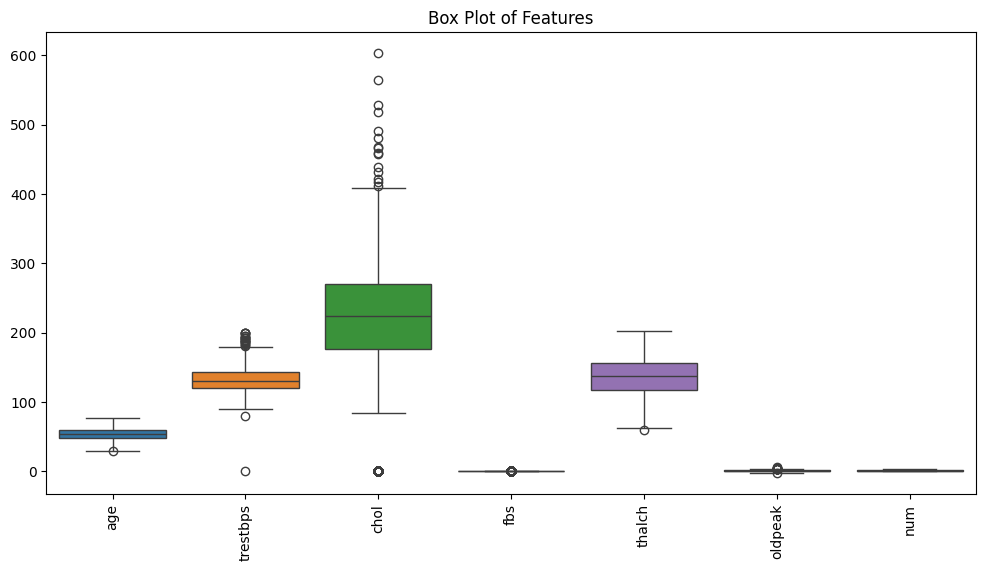

In [201]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

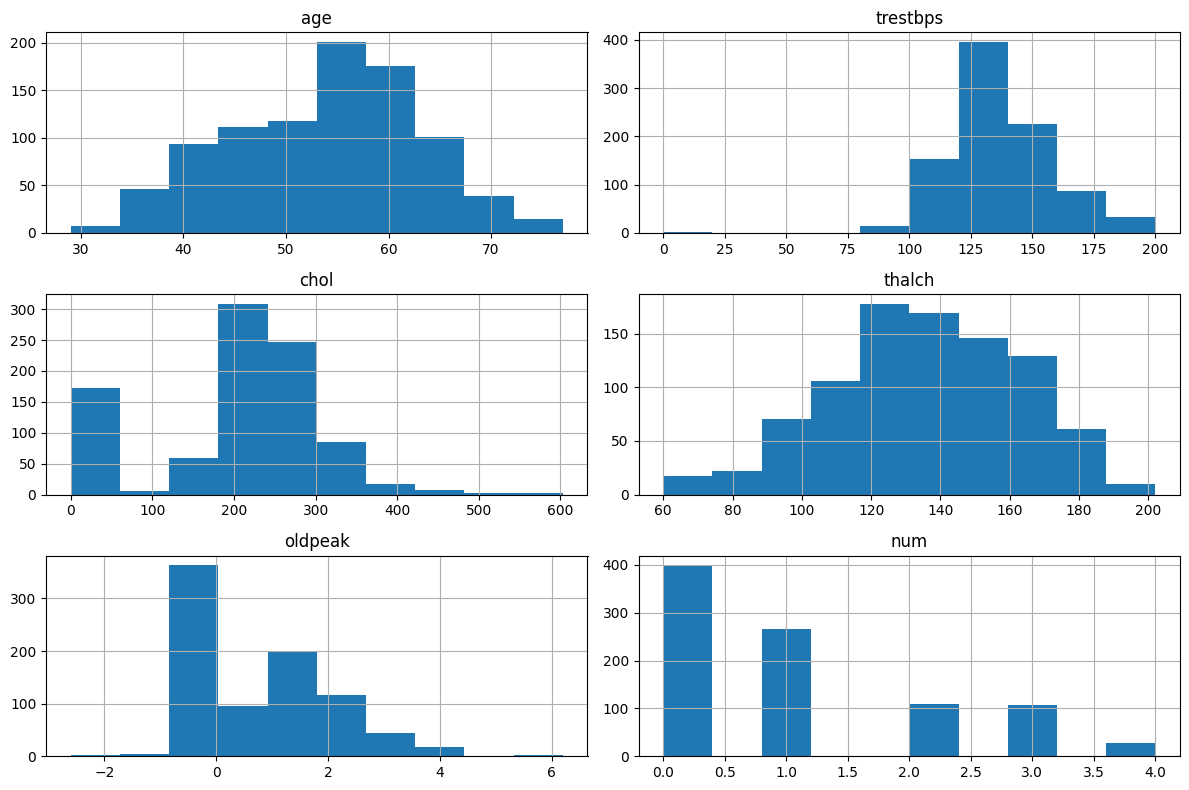

In [202]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [203]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [204]:
chol = 'chol'
Q1 = df[chol].quantile(0.25)
Q3 = df[chol].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[chol] = np.clip(df[chol], lower_bound, upper_bound)

In [205]:
trestbps = 'trestbps'
Q1 = df[chol].quantile(0.25)
Q3 = df[chol].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[chol] = np.clip(df[chol], lower_bound, upper_bound)

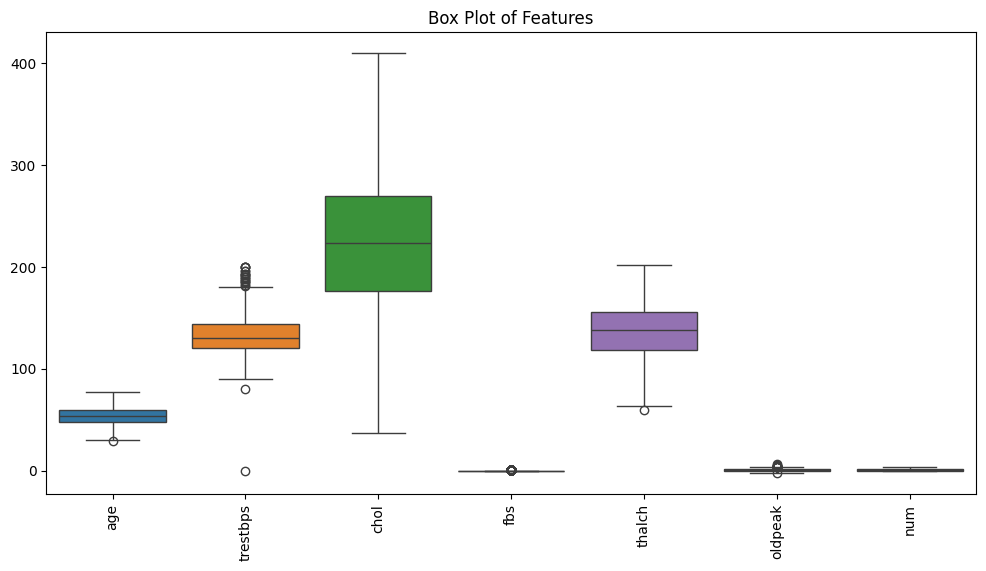

In [206]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

In [207]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [208]:
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].apply(pd.to_numeric, errors='coerce')


In [209]:
from sklearn.preprocessing import StandardScaler
numerical_features = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [210]:
encoded_df = pd.get_dummies(df, columns=object_cols, prefix=object_cols, drop_first=True)

In [211]:
object_cols = df.select_dtypes(include=['object']).columns
binary_cols = [col for col in object_cols if df[col].nunique() == 2]

In [212]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns you want to one-hot encode
object_cols = ['thal','cp', 'slope','restecg','exang','fbs', 'sex']

# Check if these columns are actually present in the DataFrame
# This is crucial for fixing the KeyError issue
missing_cols = [col for col in object_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"The following columns are missing in the DataFrame: {missing_cols}")

# Assuming the columns are present, proceed with OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df.loc[:, object_cols])

# Transform the data and create a new DataFrame with encoded features
encoded_features = encoder.transform(df.loc[:, object_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(object_cols))

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df = df.drop(object_cols, axis=1)

In [213]:
df

,age,trestbps,chol,thalch,oldpeak,num,thal_nan,cp_nan,slope_nan,restecg_nan,exang_nan,fbs_False,fbs_True,sex_nan
0,1.006027,0.567394,0.264845,0.524183,1.288612,-0.881977,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,-1.397560,0.076967,-0.045006,-0.147705,-0.815249,-0.881977,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.350503,0.322181,-0.158618,0.449529,-0.449360,-0.881977,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,-0.195767,-0.756760,-0.220589,2.017268,-0.815249,-0.881977,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,0.350503,-1.149102,-0.065663,-0.371668,0.556834,-0.881977,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.760808,-0.595631,0.556834,2.615119,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
904,0.896773,1.597292,-0.385843,-0.595631,1.928917,2.615119,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
905,0.241249,1.793463,-1.760808,-0.483649,1.471556,2.615119,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
906,0.241249,0.518352,0.006636,-1.155538,NaN,2.615119,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [214]:
from sklearn.model_selection import train_test_split
X = df.drop('age', axis=1)
y = df['chol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [216]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0001981206499211679
R-squared: 0.999773962014692


In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 7, 9, 12],
    'min_samples_split': [2, 5, 10, 15],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1377, in fit
    super()._fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_cl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00018458677603532743
R-squared: 0.9997894029573086


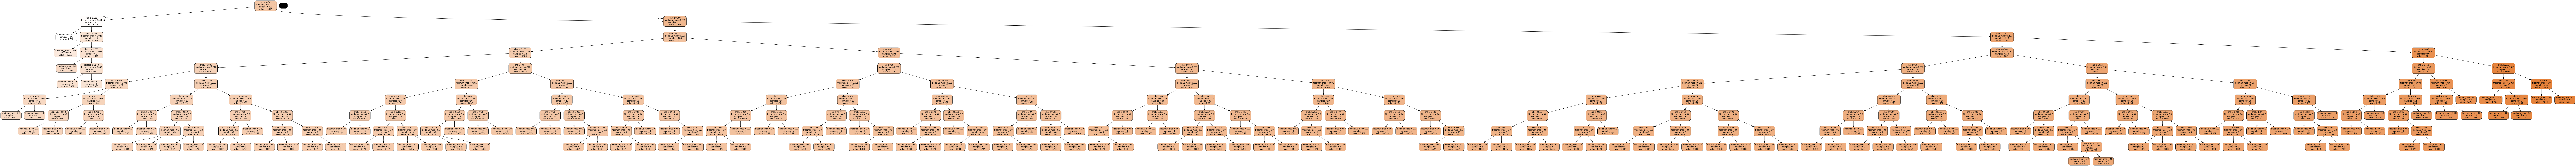

In [219]:
!pip install graphviz
!pip install pydotplus

from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

# Assuming 'best_model' is your trained DecisionTreeRegressor
dot_data = export_graphviz(
    best_model,
    out_file=None,
    feature_names=X_train.columns,  # Use column names from X_train
    filled=True,
    rounded=True,
    special_characters=True
)

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph in the notebook
Image(graph.create_png())

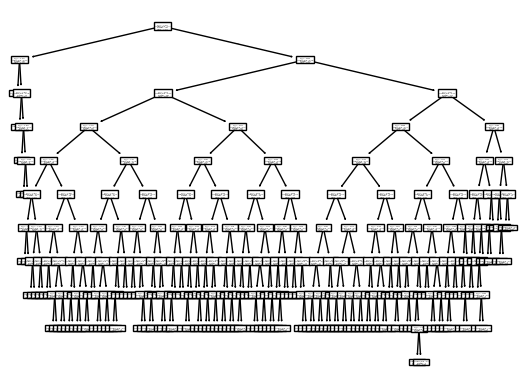

In [220]:
tree.plot_tree(best_model);

In [221]:
text = tree.export_text(best_model,max_depth=3)
print(text)

|--- feature_1 <= -0.65
|   |--- feature_1 <= -1.51
|   |   |--- value: [-1.76]
|   |--- feature_1 >  -1.51
|   |   |--- feature_1 <= -0.96
|   |   |   |--- value: [-1.10]
|   |   |--- feature_1 >  -0.96
|   |   |   |--- feature_2 <= -1.66
|   |   |   |   |--- value: [-0.68]
|   |   |   |--- feature_2 >  -1.66
|   |   |   |   |--- truncated branch of depth 2
|--- feature_1 >  -0.65
|   |--- feature_1 <= 0.56
|   |   |--- feature_1 <= 0.07
|   |   |   |--- feature_1 <= -0.18
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- feature_1 >  -0.18
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- feature_1 >  0.07
|   |   |   |--- feature_1 <= 0.31
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- feature_1 >  0.31
|   |   |   |   |--- truncated branch of depth 6
|   |--- feature_1 >  0.56
|   |   |--- feature_1 <= 1.24
|   |   |   |--- feature_1 <= 0.85
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- feature_1 >  0.85
|   |   |  

In [222]:
best_model.feature_importances_

array([1.14129456e-07, 9.99943892e-01, 3.51185847e-05, 2.06465621e-05,
       1.14129456e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14129456e-07,
       0.00000000e+00])

In [223]:
import pandas as pd

# Assuming X_train is your training data DataFrame and it has the feature names as columns
fn = X_train.columns

# Now, fn holds the feature names and can be used in the next line
feature_imp = pd.Series(best_model.feature_importances_, index=fn).sort_values(ascending=False)
feature_imp

,0
chol,9.999439e-01
thalch,3.511858e-05
oldpeak,2.064656e-05
trestbps,1.141295e-07
fbs_True,1.141295e-07
num,1.141295e-07
thal_nan,0.000000e+00
cp_nan,0.000000e+00
slope_nan,0.000000e+00
restecg_nan,0.000000e+00


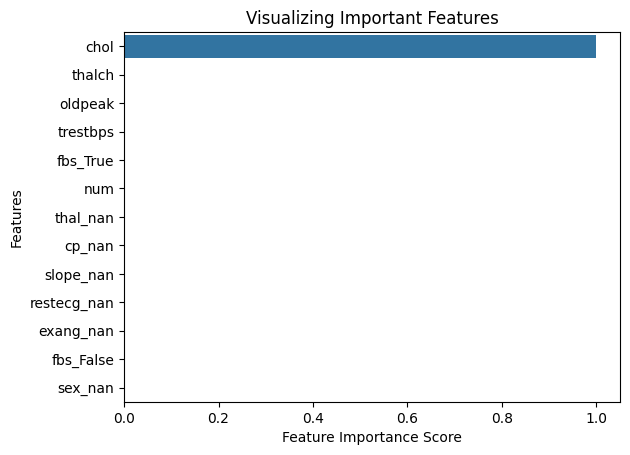

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [233]:
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

        Feature    Importance
1          chol  9.999439e-01
2        thalch  3.511858e-05
3       oldpeak  2.064656e-05
0      trestbps  1.141295e-07
11     fbs_True  1.141295e-07
4           num  1.141295e-07
5      thal_nan  0.000000e+00
6        cp_nan  0.000000e+00
7     slope_nan  0.000000e+00
8   restecg_nan  0.000000e+00
9     exang_nan  0.000000e+00
10    fbs_False  0.000000e+00
12      sex_nan  0.000000e+00


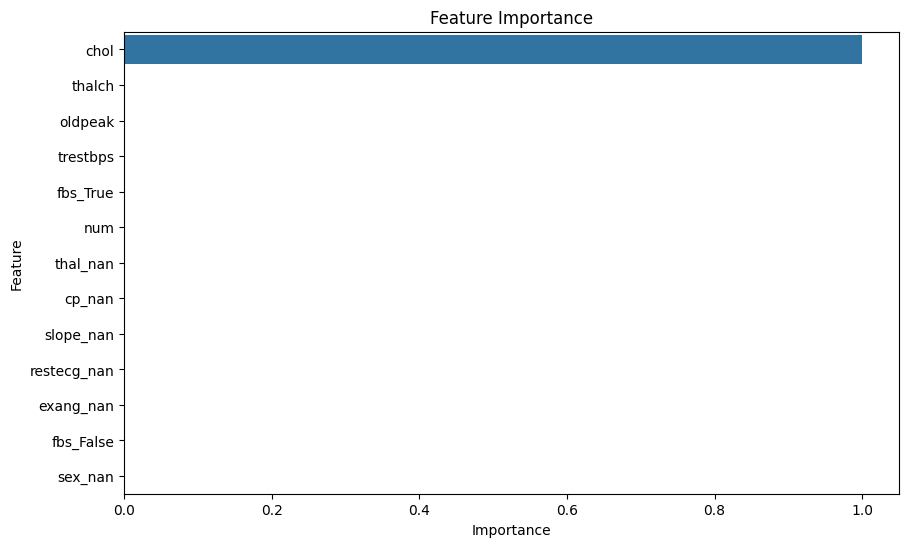

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

   # Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

criterion: Splitting criterion ('gini' or 'entropy').
max_depth: Maximum tree depth (limits complexity).
min_samples_split: Minimum samples for a node to split.
min_samples_leaf: Minimum samples for a leaf node.
max_features: Number of features considered for splits.

What is the difference between the Label encoding and One-hot encoding?

One-Hot Encoding is generally preferred for categorical features with no order, while Label Encoding is more suitable when the order of categories is meaningful.